
 
 
 ## ASML Induction: Introduction to Jupyter and R

 
In the Advanced Statistics and Machine Learning modules, we will use R for programming and data analysis. 

This document is a Jupyter R notebook. It can be used for simultaneous coding (in R) and typesetting (in Markdown).

This is not the only way of using R.  Another option is to use R Studio, which can be run either locally (based on a local installation on your laptop), or online (via R Studio Cloud), or remotely (on the Durham CIS System via AppsAnywhere), or, actually, also in some way via Jupyter.

The plain Jupyter version of using R - as illustrated here and today - will be used in ASML for the Foundations and Unsupervised Learning submodules. 

R Studio will be used in the ASML Regression and Classification submodules.


**Objectives of this induction**

* using Jupyter Notebooks;

* reading in data;

* working with vectors, matrices, and data frames; 

* basic programming devices (such as if...then, for, while, apply, functions); see also the  [Handout](http://www.maths.dur.ac.uk/~dma0je/PG/Mix/MSc/ASMLHandout.pdf).

* application to real data sets.

* basic clustering.


Solutions will be provided following the induction, which can be picked up from Jupyter the same way as you have fetched this notebook.



**Preliminaries**

As mentioned above there are two types of content in a Jupyter notebook: Code and Markdown.  This here is a Markdown cell. The following cell is a code cell. Execute the code in that cell, by clicking either on the black triangle symbol or on "Run", and try to understand what the code does.


In [1]:
x <-3
x
D <- date()
D
DayofWeek<- substr(D, 1,x)     # extracts the first x letters from date object
cat("Today's day of the week is:", DayofWeek)



[1] 3

[1] "Tue Jan 12 11:20:25 2021"

Today's day of the week is: Tue

When you define a new cell, you need to decide on whether it is a Code cell or a Markdown cell.  You can create new cells by firstly clicking "Insert" from the menu bar (and then Insert cell below / Insert cell above), and then defining the type of content in the curresponding drop-down menu (with options Markdown and Code, among some others). Do this now. Define a new Markdown cell with content "This is my first Markdown cell." and then a Code cell which computes and displays the square of the variable `x`.

This is my first Markdown cell.

In [2]:
x^2

[1] 9

**Reading in Data**

The first data set that we are going to investigate gives the energy use (kg of oil equivalent per capita) over 135 countries from 1960 to 2010.

*Energy use* is defined as the use of primary energy before transformation to other end-use fuels, which is equal to indigenous production plus imports and stock changes, minus exports and fuels supplied to ships and aircraft engaged in international transport.

Source: [Worldbank](http://data.worldbank.org/indicator/EG.USE.PCAP.KG.OE)

You can read the data in via 

In [3]:
energy.use <- read.csv("http://www.maths.dur.ac.uk/~dma0je/Data/energy.csv", header=TRUE)

If things have gone right, then

In [4]:
dim(energy.use)

[1] 135  52

should  give you the dimension $135 \times 12$.  Also, visualize the first six rows via

In [5]:
head(energy.use)

,Country,X1960,X1961,X1962,X1963,X1964,X1965,X1966,X1967,X1968,⋯,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,Albania,-,-,-,-,-,-,-,-,-,⋯,582.85,646.88,673.20,646.08,743.59,686.15,693.70,-,-,-
2,Algeria,-,-,-,-,-,-,-,-,-,⋯,875.55,918.15,964.89,959.06,983.76,1040.94,1088.75,-,-,-
3,Angola,-,-,-,-,-,-,-,-,-,⋯,528.82,537.98,552.70,577.18,549.00,575.69,605.54,-,-,-
4,Argentina,-,-,-,-,-,-,-,-,-,⋯,1549.79,1470.04,1552.91,1628.24,1629.39,1752.37,1850.19,-,-,-
5,Armenia,-,-,-,-,-,-,-,-,-,⋯,651.79,610.34,643.80,680.31,817.31,829.73,925.65,-,-,-
6,Australia,3063.6,3115.81,3172.97,3284.02,3349.42,3463.21,3546.56,3692.77,3763.59,⋯,5520.94,5633.29,5609.84,5567.24,5921.75,5924.47,5887.67,-,-,-


**Working with vectors, matrices and data frames**

The object `energy.use` is a *data frame*.  You can check whether or not an object is a data frame by typing `class(object)` or `is.data.frame(object)`. Try this for the object `energy.use` in the chunk below.


In [6]:
class(energy.use)          
is.data.frame(energy.use)   

[1] "data.frame"

[1] TRUE

It is easy to access individual rows, columns, or elements of a data frame. For instance,

In [7]:
 energy.use[127,]
 energy.use[,49]
 energy.use[127,49] 

,Country,X1960,X1961,X1962,X1963,X1964,X1965,X1966,X1967,X1968,⋯,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
127,United Kingdom,3034.35,3006.29,3084.95,3198.32,3213.07,3329.29,3307.12,3344.62,3406,⋯,3804.08,3694.21,3746.53,3719.93,3698.49,3620.68,3465.18,-,-,-


[1]   693.70  1088.75   605.54  1850.19   925.65  5887.67  3996.85  1387.90
  [9] 11551.42   163.29  2890.85  5366.42   343.50   570.95  1483.16  1068.47
 [17]  1238.99  7189.78  2641.20   358.42   390.89  8168.64  1850.79  1484.02
 [25]   664.57   289.32   356.51  1069.57   495.86  2100.54   884.02  2854.25
 [33]  4427.55  3597.77   804.18   884.81   839.94   799.77   150.80  4198.49
 [41]   289.97  6895.24  4257.74  1299.69   767.12  4026.64   415.46  2875.07
 [49]   620.35   285.70   661.40  1984.58  2657.97 15707.75   528.91   848.57
 [57]  2603.95  1104.80  3456.56  3058.87  3000.63  1852.16  4019.07  1268.90
 [65]  4292.25   484.84   774.41  4585.54  9463.13   556.47  2051.76   959.29
 [73]  2889.12  2740.24  8789.71  1482.47  2733.47  2119.55  1750.20   909.89
 [81]  1182.10   459.93   418.39   318.53   744.97   337.76 11321.17  4909.32
 [89]  3966.37   620.91   722.19  5703.57  5677.66   512.15   844.66   685.86
 [97]   493.85   450.64  2547.47  2362.76 19504.15  1805.74  4730.04  6202.50
[105]   224.75  2141.28  5830.54  3306.64  3631.59  2783.77  3207.52   463.97
[113]   362.95  5511.75  3405.85   977.91   579.72   442.82  1552.58   390.13
[121] 11505.66   864.22  1369.86  3631.02  2953.00 11832.50  3465.18  7758.94
[129]   952.79  1811.91  2319.43   655.12   323.85   604.36   758.92

[1] 3465.18

will give you the 127th row; 49th column; and the entry of the 127th row and the 49th column, respectively (this is the UK energy consumption in 2007). You can also access columns directly through their column names, such as

In [8]:
energy.use$X2007

[1]   693.70  1088.75   605.54  1850.19   925.65  5887.67  3996.85  1387.90
  [9] 11551.42   163.29  2890.85  5366.42   343.50   570.95  1483.16  1068.47
 [17]  1238.99  7189.78  2641.20   358.42   390.89  8168.64  1850.79  1484.02
 [25]   664.57   289.32   356.51  1069.57   495.86  2100.54   884.02  2854.25
 [33]  4427.55  3597.77   804.18   884.81   839.94   799.77   150.80  4198.49
 [41]   289.97  6895.24  4257.74  1299.69   767.12  4026.64   415.46  2875.07
 [49]   620.35   285.70   661.40  1984.58  2657.97 15707.75   528.91   848.57
 [57]  2603.95  1104.80  3456.56  3058.87  3000.63  1852.16  4019.07  1268.90
 [65]  4292.25   484.84   774.41  4585.54  9463.13   556.47  2051.76   959.29
 [73]  2889.12  2740.24  8789.71  1482.47  2733.47  2119.55  1750.20   909.89
 [81]  1182.10   459.93   418.39   318.53   744.97   337.76 11321.17  4909.32
 [89]  3966.37   620.91   722.19  5703.57  5677.66   512.15   844.66   685.86
 [97]   493.85   450.64  2547.47  2362.76 19504.15  1805.74  4730.04  6202.50
[105]   224.75  2141.28  5830.54  3306.64  3631.59  2783.77  3207.52   463.97
[113]   362.95  5511.75  3405.85   977.91   579.72   442.82  1552.58   390.13
[121] 11505.66   864.22  1369.86  3631.02  2953.00 11832.50  3465.18  7758.94
[129]   952.79  1811.91  2319.43   655.12   323.85   604.36   758.92

Data frames are very important as they are the standard form in which data are expected by many R functions, such as
`lm`, `glm`,....

Let us now simplify the data frame a little bit, so that it is easier to use for the applied work. We reduce our interest to the energy consumption
in the years 2001 and 2007. We do this via

In [9]:
 energy <- energy.use[,c("X2001", "X2007")]

Also, we would like to give the rows and columns of the new data frame meaningful names.  Please type 

In [10]:
rownames(energy)<- energy.use[, 1]
colnames(energy)<- c("use01", "use07")


in order to specify row and column names, respectively.  Then type `energy` to look at your final data frame.  

This data frame allows to access information quickly. For instance,

In [11]:
 energy["United Kingdom",]

,use01,use07
,<dbl>,<dbl>
United Kingdom,3804.08,3465.18


gives you the UK values of energy consumption. **DO THIS** for a couple of countries.

In [12]:
 energy["Spain",] 
 energy["China",]


,use01,use07
,<dbl>,<dbl>
Spain,3070.42,3207.52


,use01,use07
,<dbl>,<dbl>
China,855.11,1484.02


**Basic programming devices**

One may be interested in looking at these data in a form in which they are *ordered* by their energy consumption.  This can be done using


In [13]:
 order(energy$use07)

[1]  39  10 105  50  26  41  84 133  86  13  27  20 113 120  21  47  83 118
 [19]  98  82 112  66  97  29  94  55  70  14 117 134   3  49  90 132  51  25
 [37]  96   1  91  85 135  45  67  38  35  37  95  56 122  31  36  80   5 129
 [55]  72 116  16  28   2  58  81  17  64  44 123   8  76  15  24 119  79 102
 [73] 130   4  23  62  52  71  30  78 106 131 100  99  57  19  53  77  74 110
 [91]  32  48  73  11 125  61  60 111 108 115  59 127  34 124 109  89   7  63
[109]  46  40  43  65  33  68 103  88  12 114  93  92 107   6 104  42  18 128
[127]  22  75  69  87 121   9 126  54 101

which gives you a list of numbers. The first number tells you the index (here: 39) of the country with the smallest per-capita energy consumption (here: Eritrea), and typing `energy[order(energy$use07),]`
gives you the full ordered list. 

In the chunk below, save this ordered data frame into a new data frame `senergy`.

In [14]:
senergy <- energy[order(energy$use07),] 

Next, we wish to identify the nations with extremely large  energy consumption, say, more than 10000 kg of oil per capita  (Intuitively, what do you think, which countries will this be?). Calling

In [15]:
energy$use07 > 10000

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121]  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE

will give you a vector of logical values, with a  `TRUE`  for each country for which this condition is met. The command

In [16]:
sum(energy$use07 > 10000)

[1] 6

will tell you how many these are, and


In [17]:
 which(energy$use07 > 10000)

[1]   9  54  87 101 121 126

will give you the index numbers of these countries. From this, we would get the data rows corresponding to these countries via

In [18]:
 energy[which(energy$use07 > 10000),]

,use01,use07
,<dbl>,<dbl>
Bahrain,9126.95,11551.42
Iceland,11361.40,15707.75
Netherlands Antilles,11431.36,11321.17
Qatar,19794.22,19504.15
Trinidad and Tobago,7783.08,11505.66
United Arab Emirates,9871.25,11832.50


We would like to compare the energy use in 2001 and 2007. Do the same as above but now use the condition `energy$use01 > energy$use07` instead.  Observe and understand the information that you gain at each step.

In [19]:
energy$use01> energy$use07            
sum(energy$use01> energy$use07)       
which(energy$use01> energy$use07)     
energy[which(energy$use01> energy$use07),] 

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE
 [37] FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE
 [49]  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
 [61]  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE
 [73]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE
 [97] FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE
[109] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE
[133] FALSE FALSE  TRUE

[1] 34

[1]   8  12  21  31  35  39  43  46  49  52  59  61  67  72  73  87  89  92  95
[20]  96  98 100 101 105 108 113 114 115 116 127 128 130 131 135

,use01,use07
,<dbl>,<dbl>
Azerbaijan,1404.86,1387.90
Belgium,5672.21,5366.42
Cameroon,393.04,390.89
Cuba,1000.48,884.02
Dominican Republic,861.84,804.18
Eritrea,194.64,150.80
France,4413.42,4257.74
Germany,4219.15,4026.64
Guatemala,631.31,620.35


A very useful tool to carry out repeated operations is the `for` command (see [Handout](http://www.maths.dur.ac.uk/~dma0je/PG/Mix/MSc/ASMLHandout.pdf)!).

Task: Implement a loop which, for all 135 countries, writes a text  like

<center>
 In 2007,  the energy use in *country* was equivalent to *value*   kg oil per capita.
</center>&nbsp;

In [20]:
 for (i in 1:135){   
   cat("In 2007, the energy use in ", rownames(energy)[i], " was equivalent to",  energy[i,2], "kg oil per capita.", "\n")
  } 


In 2007, the energy use in  Albania  was equivalent to 693.7 kg oil per capita. 
In 2007, the energy use in  Algeria  was equivalent to 1088.75 kg oil per capita. 
In 2007, the energy use in  Angola  was equivalent to 605.54 kg oil per capita. 
In 2007, the energy use in  Argentina  was equivalent to 1850.19 kg oil per capita. 
In 2007, the energy use in  Armenia  was equivalent to 925.65 kg oil per capita. 
In 2007, the energy use in  Australia  was equivalent to 5887.67 kg oil per capita. 
In 2007, the energy use in  Austria  was equivalent to 3996.85 kg oil per capita. 
In 2007, the energy use in  Azerbaijan  was equivalent to 1387.9 kg oil per capita. 
In 2007, the energy use in  Bahrain  was equivalent to 11551.42 kg oil per capita. 
In 2007, the energy use in  Bangladesh  was equivalent to 163.29 kg oil per capita. 
In 2007, the energy use in  Belarus  was equivalent to 2890.85 kg oil per capita. 
In 2007, the energy use in  Belgium  was equivalent to 5366.42 kg oil per capita. 


Another command for repeated operations is `while`. It does not have a fixed number of loops, but proceeds until a certain condition is met. For instance, consider the ordered frame `senergy` created above. Assume we are interested in the following question: If we take exactly one person from each of the countries with the smallest energy use, i.e. one person from  Eritrea, one person from Bangladesh, etc., then how many persons are needed in order to achieve the same use of energy as a single person in Qatar?

To answer this, create objects `i` and `sum07` and assign them the initial value 0. Then use the `while` function (see [Handout](http://www.maths.dur.ac.uk/~dma0je/PG/Mix/MSc/ASMLHandout.pdf)) with *condition* `sum07< senergy["Qatar",2]` and *action* `i     <- i+1; sum07 <- sum07+  senergy[i,2]`.  Make it clear to yourself what each row does. Also, interpret the result.


In [30]:
 energy["Qatar",]      
  i     <-0             
  sum07 <-0             
  while(sum07< senergy["Qatar",2] ){
     i=i+1                          
     sum07<- sum07+  senergy[i,2]   
  }                                 
  i                                 
  sum07                             
  # So individuals from the 41 least-consuming countries use less energy per captita than one single individual in Qatar!  


,use01,use07,luse01,luse07
,<dbl>,<dbl>,<dbl>,<dbl>
Qatar,19794.22,19504.15,9.893145,9.878383


[1] 42

[1] 20265.34

Use `apply` to compute a vector which contains, for each country, the larger of the two energy consumption values given for 2001 and 2007. Consult the see [Handout](http://www.maths.dur.ac.uk/~dma0je/PG/Mix/MSc/ASMLHandout.pdf) and the corresponding help file (via `help(apply)` or `?apply`) if you are unsure how to do this.


In [22]:
apply(energy,1,max)

Albania                Algeria                 Angola 
                693.70                1088.75                 605.54 
             Argentina                Armenia              Australia 
               1850.19                 925.65                5887.67 
               Austria             Azerbaijan                Bahrain 
               3996.85                1404.86               11551.42 
            Bangladesh                Belarus                Belgium 
                163.29                2890.85                5672.21 
                 Benin                Bolivia Bosnia and Herzegovina 
                343.50                 570.95                1483.16 
              Botswana                 Brazil      Brunei Darussalam 
               1068.47                1238.99                7189.78 
              Bulgaria               Cambodia               Cameroon 
               2641.20                 358.42                 393.04 
                Canada                  Chile                  China 
               8168.64                1850.79                1484.02 
              Colombia    Congo, Dem. Rep. of            Congo, Rep. 
                664.57                 289.32                 356.51 
            Costa Rica          Cote d'Ivoire                Croatia 
               1069.57                 495.86                2100.54 
                  Cuba                 Cyprus         Czech Republic 
               1000.48                2854.25                4427.55 
               Denmark     Dominican Republic                Ecuador 
               3597.77                 861.84                 884.81 
      Egypt, Arab Rep.            El Salvador                Eritrea 
                839.94                 799.77                 194.64 
               Estonia               Ethiopia                Finland 
               4198.49                 289.97                6895.24 
                France                  Gabon                Georgia 
               4413.42                1299.69                 767.12 
               Germany                  Ghana                 Greece 
               4219.15                 415.46                2875.07 
             Guatemala                  Haiti               Honduras 
                631.31                 285.70                 661.40 
  Hong Kong SAR, China                Hungary                Iceland 
               2053.23                2657.97               15707.75 
                 India              Indonesia  Iran, Islamic Rep. of 
                528.91                 848.57                2603.95 
                  Iraq                Ireland                 Israel 
               1104.80                3737.54                3058.87 
                 Italy                Jamaica                  Japan 
               3006.39                1852.16                4019.07 
                Jordan             Kazakhstan                  Kenya 
               1268.90                4292.25                 484.84 
      Korea, D.P.R. of         Korea, Rep. of                 Kuwait 
                889.59                4585.54                9463.13 
       Kyrgyz Republic                 Latvia                Lebanon 
                556.47                2051.76                1384.04 
                 Libya              Lithuania             Luxembourg 
               3113.33                2740.24                8789.71 
        Macedonia, FYR               Malaysia                  Malta 
               1482.47                2733.47                2119.55 
                Mexico                Moldova               Mongolia 
               1750.20                 909.89                1182.10 
               Morocco             Mozambique                Myanmar 
                459.93                 418.39                 318.53 
               Namibia                  Nepal   Netherlands Antilles 
                744.97   

**Basic data visualization**

Use `hist` and `boxplot` to create  histograms and boxplots of the variables `use01` and `use07`. Comment on the distributional shape.

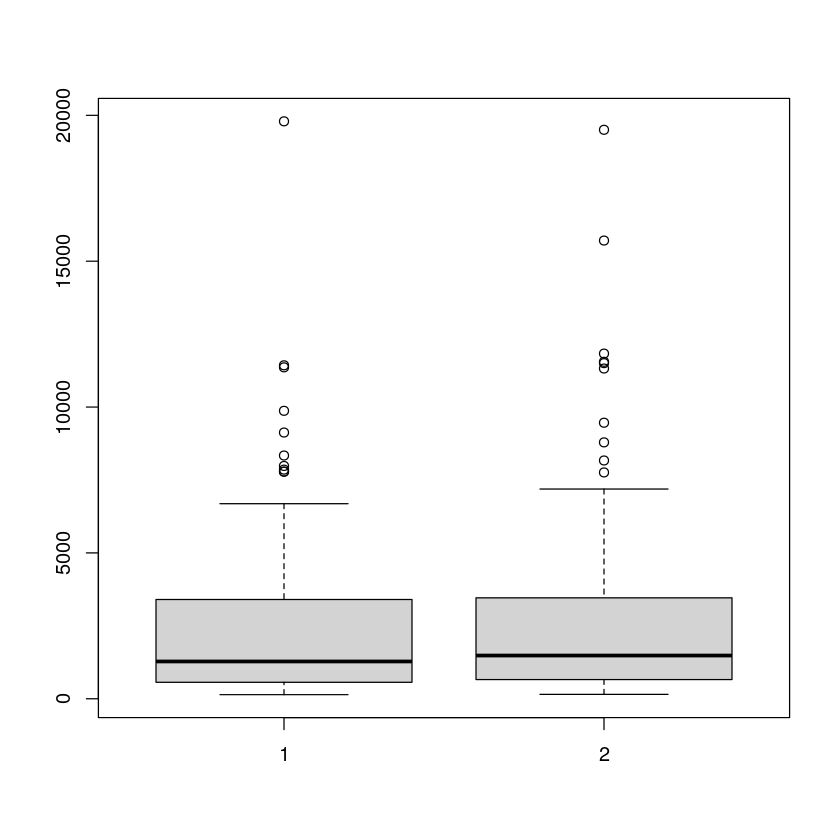

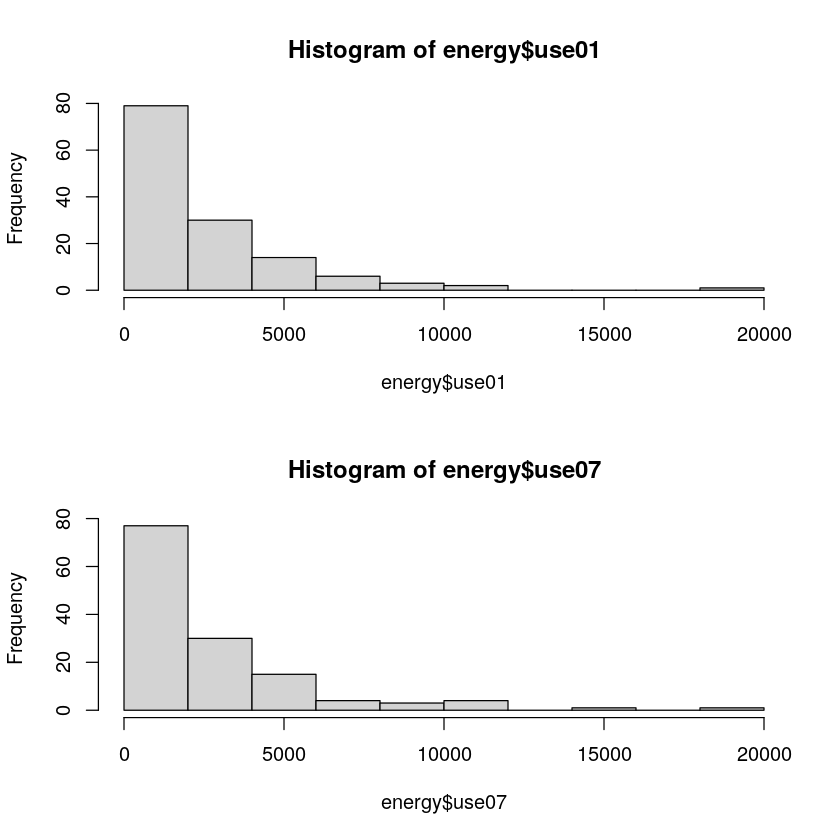

In [23]:
 boxplot(energy$use01, energy$use07)   
 par(mfrow=c(2,1))                     
 hist(energy$use01)                    
 hist(energy$use07) 

Next, add logarithmic versions of these variables, say `luse01` and`luse07`,  to the data frame via


In [35]:
energy$luse01<- log(energy$use01)

In [36]:
energy

,use01,use07,luse01,luse07,luse02
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Albania,582.85,693.70,6.367930,6.542040,6.367930
Algeria,875.55,1088.75,6.774852,6.992786,6.774852
Angola,528.82,605.54,6.270648,6.406121,6.270648
Argentina,1549.79,1850.19,7.345875,7.523044,7.345875
Armenia,651.79,925.65,6.479722,6.830496,6.479722
Australia,5520.94,5887.67,8.616303,8.680616,8.616303
Austria,3759.78,3996.85,8.232116,8.293262,8.232116
Azerbaijan,1404.86,1387.90,7.247693,7.235547,7.247693
Bahrain,9126.95,11551.42,9.118987,9.354564,9.118987


and for`use07`  analogously. Repeat the previous question using the transformed variables. What can we say about the distribution of these transformed variables, compared to the original ones?

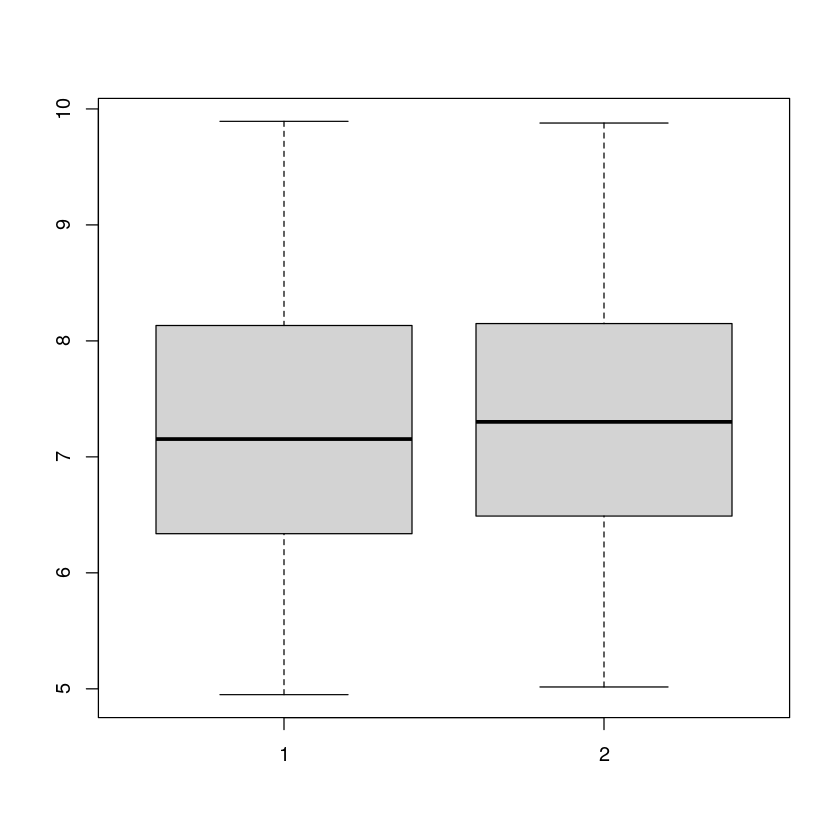

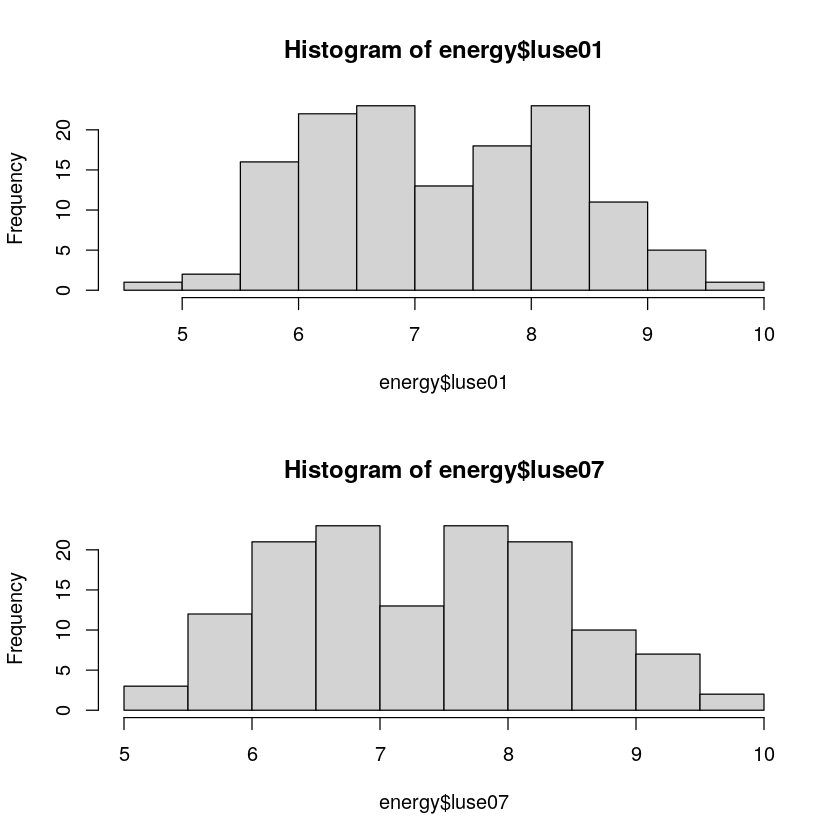

In [37]:
  energy$luse07 <- log(energy$use07)   
  boxplot(energy$luse01, energy$luse07)
  par(mfrow=c(2,1))                    
  hist(energy$luse01)                  
  hist(energy$luse07)   

**Simple clustering via k-means**

Next, we consider a data set featuring $n=82$ observations of galaxy velocities. Load the `galaxies` data, read the associated help file, and create a histogram using the option `breaks =18` in function `hist`.

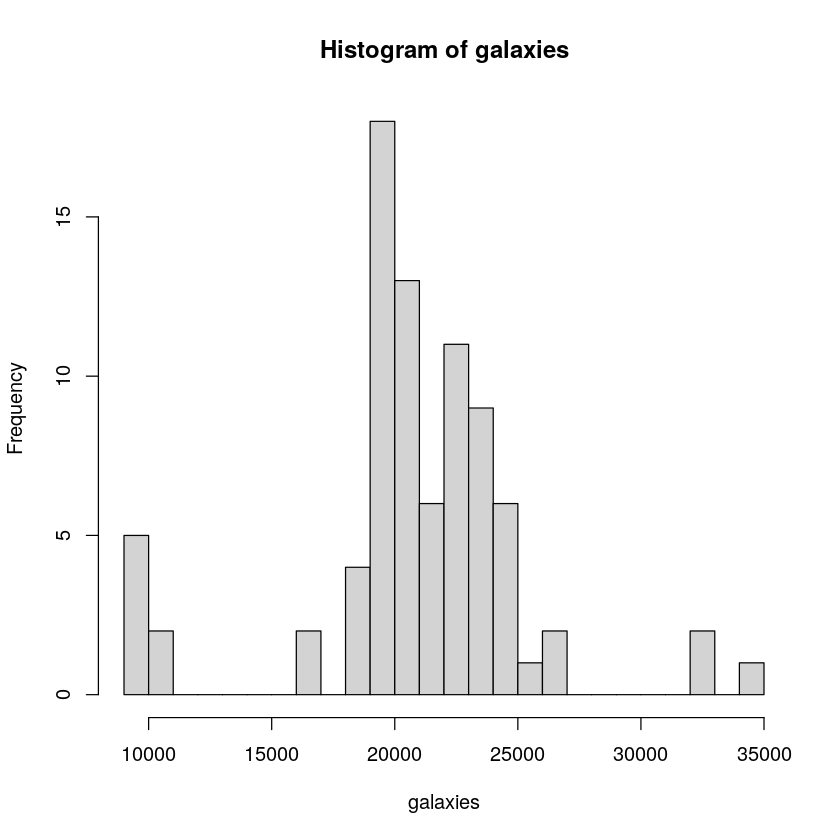

In [26]:
 data(galaxies, package="MASS")  
 ?galaxies
hist(galaxies, breaks=18)

For both data sets, the dominating feature is the presence of multiple modes or `clusters'. It is a relevant problem in Statistics and Machine Learning to identify such clusters, and also find the corresponding cluster centers. A simple method to do this is the **k-means algorithm**. See for instance [this resource](https://bigdata-madesimple.com/possibly-the-simplest-way-to-explain-k-means-algorithm/) for a quick introduction into this algorithm.

In R, this algorithm is implemented in  the function `kmeans`. The algorithm requires the specification of the number of clusters in advance, through the argument `centers`.  Study the help file of `kmeans` and then apply this function  onto the `luse01` and `galaxies` data. You will need only the first two arguments of `kmeans`. For the choice of the number of clusters, you can use visual inspection as a guide for your choice. 

In [39]:
?kmeans
kmeans(energy$luse01, centers=2)
kmeans(galaxies, centers=5)

K-means clustering with 2 clusters of sizes 70, 65

Cluster means:
      [,1]
1 6.351430
2 8.200233

Clustering vector:
  [1] 1 1 1 2 1 2 2 1 2 1 2 2 1 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 2 1 2 2 2 1 1 1
 [38] 1 1 2 1 2 2 1 1 2 1 2 1 1 1 2 2 2 1 1 2 1 2 2 2 2 2 1 2 1 1 2 2 1 2 1 2 2
 [75] 2 1 2 2 2 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2
[112] 1 1 2 2 1 1 1 1 1 2 1 1 2 2 2 2 2 1 2 2 1 1 1 1

Within cluster sum of squares by cluster:
[1] 18.08677 20.86167
 (between_SS / total_SS =  74.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

K-means clustering with 5 clusters of sizes 2, 3, 33, 37, 7

Cluster means:
       [,1]
1 16127.000
2 33044.333
3 23400.303
4 19901.135
5  9710.143

Clustering vector:
 [1] 5 5 5 5 5 5 5 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[39] 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[77] 3 3 3 2 2 2

Within cluster sum of squares by cluster:
[1]     3698  2548691 56051277 19904726  1249607
 (between_SS / total_SS =  95.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Have a look at the produced output and try to understand and interpret it in the light of the graphical representations of the data presented earlier.

This was an example for the application a very simple clustering technique, in the one-dimensional (univariate) case.

In the "Unsupervised Learning" submodule, we will pick up from here, and consider more advanced clustering techniques, as well as clustering in higher dimensions.

The "Regression" and "Classifications" submodules will be set in the world of *supervised learning*, where training samples with true and known class labels (or output values) are available.


**Further resources**

If you would like to do do a bit more to improve your R skills, we recommend the following resources:

* [https://education.rstudio.com/](https://education.rstudio.com/)
* [https://www.jaredknowles.com/r-bootcamp](https://www.jaredknowles.com/r-bootcamp)



**Thanks for your participation, and see you in January!**

***The ASML Lecturers***

Jochen Einbeck, jochen.einbeck@durham.ac.uk

Ian Jermyn, i.h.jermyn@durham.ac.uk

Louis Aslett, louis.aslett@durham.ac.uk
